# Step 0: Explore the Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("./Data/Sale.csv")

In [2]:
df = pd.DataFrame(df)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981226 entries, 0 to 981225
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SalesKey             981226 non-null  int64  
 1   Date                 981226 non-null  object 
 2   channelKey           981226 non-null  int64  
 3   StoreKey             981226 non-null  int64  
 4   ProductKey           981226 non-null  int64  
 5   PromotionKey         981226 non-null  int64  
 6   UnitCost             981226 non-null  float64
 7   UnitPrice            981226 non-null  float64
 8   SalesQuantity        981226 non-null  int64  
 9   ReturnQuantity       981226 non-null  int64  
 10  TotalDiscountAmount  981226 non-null  float64
 11  TotalCost            981226 non-null  float64
 12  SalesAmount          981226 non-null  float64
dtypes: float64(5), int64(7), object(1)
memory usage: 97.3+ MB


In [4]:

df['Date'] = pd.to_datetime(df['Date'].str.replace('_', '/'))
df['Date'] = pd.to_datetime(df['Date'])


C:\Users\Rajmohan Shivendra\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13/01/2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Rajmohan Shivendra\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '14/01/2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Rajmohan Shivendra\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15/01/2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\Rajmohan Shivendra\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '16/01/

In [5]:
df = df[["Date", "SalesAmount"]]
df.columns = ["Date", "SalesAmount"]

df.head()

,Date,SalesAmount
0,2020-01-01,3019.68
1,2020-01-01,173.79
2,2020-01-01,1674.27
3,2020-01-01,1884.78
4,2020-01-01,2737.71


In [6]:
print(df)

             Date  SalesAmount
0      2020-01-01      3019.68
1      2020-01-01       173.79
2      2020-01-01      1674.27
3      2020-01-01      1884.78
4      2020-01-01      2737.71
...           ...          ...
981221 2022-12-31      2467.15
981222 2022-12-31      1204.34
981223 2022-12-31      7576.69
981224 2022-12-31      1883.11
981225 2022-12-31     10470.10

[981226 rows x 2 columns]


In [7]:
# df = df.groupby(df.index)['SalesAmount'].sum()

# Print the resulting DataFrame
# print(df)

grouped_df = df.groupby(['Date']).agg({
    'SalesAmount': 'sum'
}).reset_index()

In [8]:
grouped_df

,Date,SalesAmount
0,2020-01-01,1692303.99
1,2020-01-02,3054833.55
2,2020-01-03,3247512.46
3,2020-01-04,3898511.58
4,2020-01-05,4251810.43
...,...,...
1090,2022-12-27,3991464.52
1091,2022-12-28,3562483.91
1092,2022-12-29,4045883.60
1093,2022-12-30,3822636.36


In [9]:
df = grouped_df

In [10]:
df.head()

,Date,SalesAmount
0,2020-01-01,1692303.99
1,2020-01-02,3054833.55
2,2020-01-03,3247512.46
3,2020-01-04,3898511.58
4,2020-01-05,4251810.43


<AxesSubplot:xlabel='Date'>

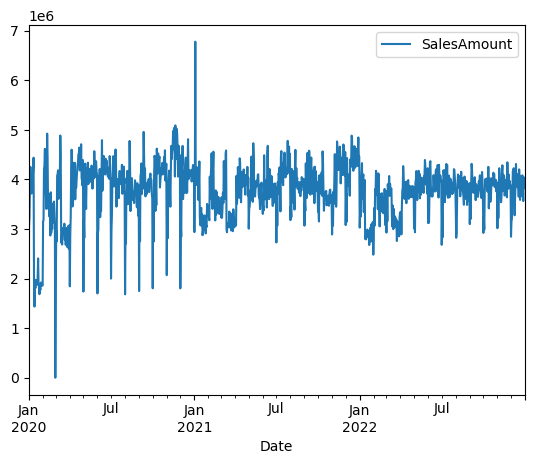

In [11]:
df.describe()
df.set_index('Date',inplace=True)
df = df.resample('D').sum()

# from pylab import rcParams
# rcParams['figure.figsize'] = 15, 7
df.plot()

In [14]:
# s

In [15]:
from statsmodels.tsa.stattools import adfuller

In [16]:
test_result=adfuller(df['SalesAmount'])

In [17]:
# #H0: it is non-stationary
# #H1: it is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )

    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
    else:
        print("weak evidence against null hypothesis,indicating it is non-stationary ")

adfuller_test(df['SalesAmount'])

ADF Test Statistic : -6.242586634289706
p-value : 4.658179162171591e-08
#Lags Used : 11
Number of Observations : 1084
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


# Differencing

In [18]:

df['Sales First Difference'] = df['SalesAmount'] - df['SalesAmount'].shift(1)


In [19]:
df['SalesAmount'].shift(1)

Date
2020-01-01           NaN
2020-01-02    1692303.99
2020-01-03    3054833.55
2020-01-04    3247512.46
2020-01-05    3898511.58
                 ...    
2022-12-27    4081488.26
2022-12-28    3991464.52
2022-12-29    3562483.91
2022-12-30    4045883.60
2022-12-31    3822636.36
Freq: D, Name: SalesAmount, Length: 1096, dtype: float64

In [20]:

df['Seasonal First Difference']=df['SalesAmount']-df['SalesAmount'].shift(12)


In [21]:
df.head(14)

,SalesAmount,Sales First Difference,Seasonal First Difference
Date,,,
2020-01-01,1692303.99,NaN,NaN
2020-01-02,3054833.55,1362529.56,NaN
2020-01-03,3247512.46,192678.91,NaN
2020-01-04,3898511.58,650999.12,NaN
2020-01-05,4251810.43,353298.85,NaN
2020-01-06,4010476.37,-241334.06,NaN
2020-01-07,3714053.75,-296422.62,NaN
2020-01-08,3718770.34,4716.59,NaN
2020-01-09,4030855.85,312085.51,NaN


In [22]:
## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -11.043696565203463
p-value : 5.287711952404025e-20
#Lags Used : 21
Number of Observations : 1062
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


<AxesSubplot:xlabel='Date'>

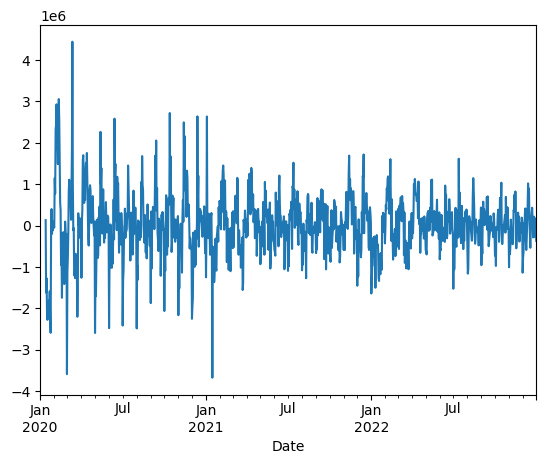

In [23]:
df['Seasonal First Difference'].plot()

# Auto Regressive Model

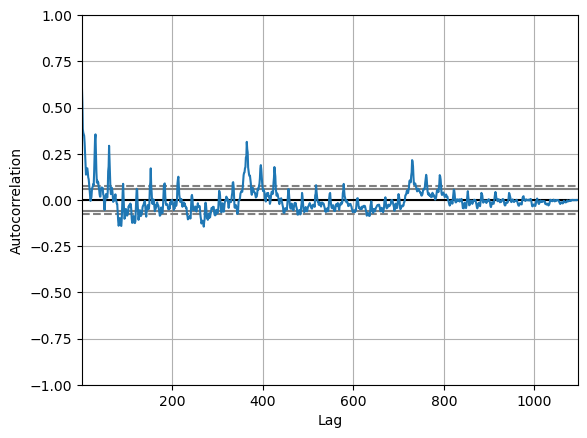

In [24]:
# from pandas.tools.plotting import autocorrelation_plot
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['SalesAmount'])
plt.show()


## Final Thoughts on Autocorrelation and Partial Autocorrelation

    Identification of an AR model is often best done with the PACF.
        For an AR model, the theoretical PACF “shuts off” past the order of the model. The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point. Put another way, the number of non-zero partial autocorrelations gives the order of the AR model. By the “order of the model” we mean the most extreme lag of x that is used as a predictor.

    Identification of an MA model is often best done with the ACF rather than the PACF.
        For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner. A clearer pattern for an MA model is in the ACF. The ACF will have non-zero autocorrelations only at lags involved in the model.

    p,d,q p AR model lags d differencing q MA lags



In [25]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf


import statsmodels.api as sm



C:\Users\Rajmohan Shivendra\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


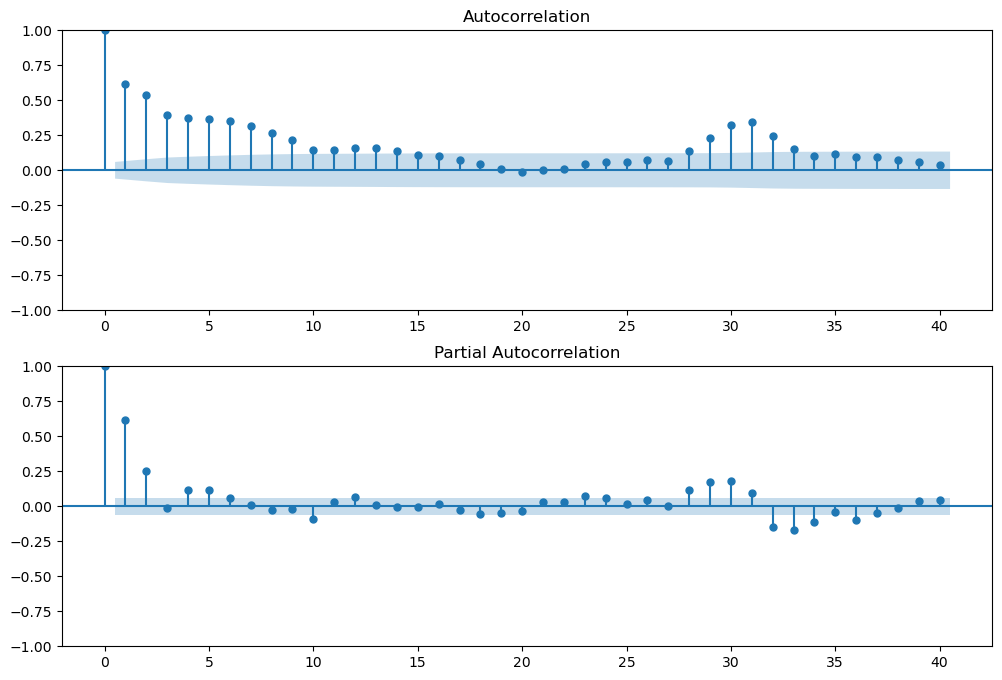

In [26]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['SalesAmount'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['SalesAmount'].iloc[13:],lags=40,ax=ax2)

In [27]:


# For non-seasonal data
#p=1, d=1, q=0 or 1
# from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf



In [28]:


model=ARIMA(df['SalesAmount'],order=(3,0,0))
model_fit=model.fit()



In [29]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            SalesAmount   No. Observations:                 1096
Model:                 ARIMA(3, 0, 0)   Log Likelihood              -15810.413
Date:                Sun, 13 Aug 2023   AIC                          31630.826
Time:                        18:36:31   BIC                          31655.823
Sample:                    01-01-2020   HQIC                         31640.284
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.759e+06   4.45e+04     84.526      0.000    3.67e+06    3.85e+06
ar.L1          0.4773      0.023     20.405      0.000       0.431       0.523
ar.L2          0.2484      0.026      9.449      0.000       0.197       0.300
ar.L3         -0.0183      0.026     -0.700      0.484      -0.070       0.033
sigma2      1.961e+11      0.205   9.59e+11      0.000    1.96e+11    1.96e+11
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):              3916.00
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               0.31   Skew:                            -1.08
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.43e+26. Standard errors may be unstable.
"""

<AxesSubplot:xlabel='Date'>

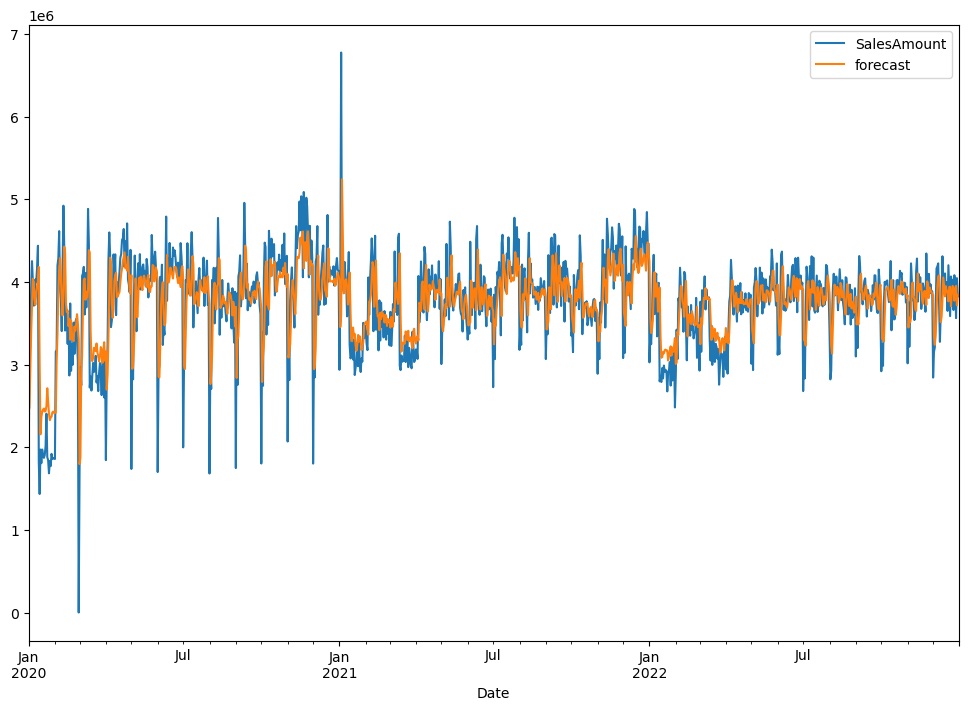

In [30]:
df['forecast']=model_fit.predict(start=0,end=1094,dynamic=False)
df[['SalesAmount','forecast']].plot(figsize=(12,8))

In [31]:
# model_list = model_fit.forecast(30)

In [32]:
# model_list

2023-01-01    3.804439e+06
2023-01-02    3.797689e+06
2023-01-03    3.787431e+06
2023-01-04    3.781365e+06
2023-01-05    3.776045e+06
                  ...     
2023-05-26    3.759057e+06
2023-05-27    3.759057e+06
2023-05-28    3.759057e+06
2023-05-29    3.759057e+06
2023-05-30    3.759057e+06
Freq: D, Name: predicted_mean, Length: 150, dtype: float64

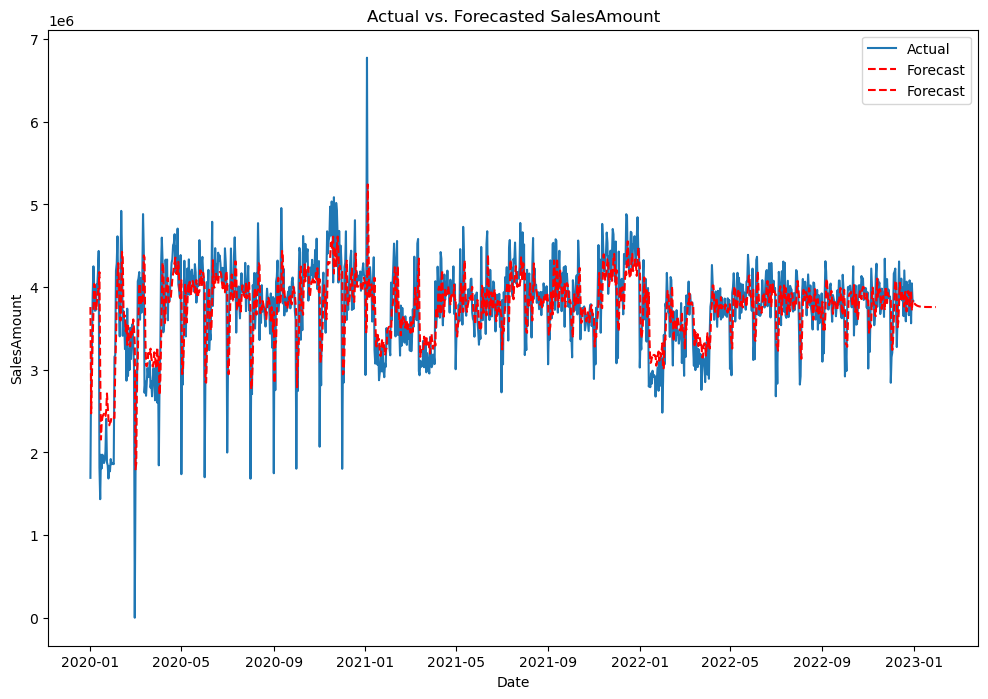

In [33]:
# df['forecast']=model_fit.predict(start=0,end=1094,dynamic=False)
# df[['SalesAmount','forecast']].plot(figsize=(12,8))

# model = ARIMA(df['SalesAmount'], order=(1, 1, 1))
# model_fit = model.fit()

model=ARIMA(df['SalesAmount'],order=(3,0,0))
model_fit=model.fit()

forecast_length = 30
model_list = model_fit.forecast(steps=forecast_length)

future_dates = pd.date_range(start=df.index[-1], periods=forecast_length + 1, freq='D')[1:]
forecast_df = pd.DataFrame({'Date': future_dates, 'forecast': model_list})

combined_df = pd.concat([df, forecast_df.set_index('Date')], axis=1)

# Plot the 'SalesAmount' and 'forecast'
plt.figure(figsize=(12, 8))
plt.plot(combined_df.index, combined_df['SalesAmount'], label='Actual')
plt.plot(combined_df.index, combined_df['forecast'], color='red', linestyle='dashed', label='Forecast')
plt.xlabel('Date')
plt.ylabel('SalesAmount')
plt.title('Actual vs. Forecasted SalesAmount')
plt.legend()
plt.show()



# Commented Codes

In [12]:
# rows_to_remove = int(len(df) * 0.9)

# # Sort the DataFrame by 'SalesAmount' in ascending order
# df_sorted = df.sort_values(by='SalesAmount', ascending=True)

# # Create a new DataFrame by slicing the sorted DataFrame
# df = df_sorted.iloc[rows_to_remove:]

# # Reset the index if needed
# df.reset_index(inplace=True)

# # Display the subset DataFrame
# print(df)

In [13]:


# from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# acf_original = plot_acf(df_train)

# pacf_original = plot_pacf(df_train)



In [ ]:
# import statsmodels.api as sm

In [ ]:
# model=sm.tsa.statespace.SARIMAX(df['SalesAmount'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
# results=model.fit()

In [ ]:
# df.shape

In [ ]:
# df['forecast']=results.predict(start=0,end=1094,dynamic=False)
# df[['SalesAmount','forecast']].plot(figsize=(12,8))

In [ ]:


# from pandas.tseries.offsets import DateOffset
# future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]



In [ ]:
# future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [ ]:


# future_datest_df.tail()



In [ ]:
# future_df=pd.concat([df,future_datest_df])

In [ ]:
# future_df['forecast'] = results.predict(start = 104, end = 120, dynamic= True)  
# future_df[['SalesAmount', 'forecast']].plot(figsize=(12, 8)) 

In [ ]:
# # model=ARIMA(df['SalesAmount'],order=(1,1,1))
# # model_fit=model.fit()

# model = ARIMA(df['SalesAmount'], order=(1, 1, 1))
# model_fit = model.fit()

# # Print the model summary
# print(model_fit.summary())

# # Plot residuals
# residuals = pd.DataFrame(model_fit.resid)
# residuals.plot()
# plt.show()

# # Plot ACF and PACF of residuals
# from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# plot_acf(residuals)
# plot_pacf(residuals)
# plt.show()

In [ ]:
# from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
# import statsmodels.api as sm

In [ ]:
# fig = plt.figure(figsize=(12,8))
# ax1 = fig.add_subplot(211)
# fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
# ax2 = fig.add_subplot(212)
# fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

In [ ]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
# from statsmodels.tsa.arima_model import ARIMA

In [ ]:
# model=ARIMA(df['SalesAmount'],order=(1,1,1))
# model_fit=model.fit()

In [ ]:
# import pandas as pd
# import statsmodels.api as sm

# # Assuming you have already imported your DataFrame 'df'

# # Specify the order (p, d, q) for ARIMA
# order = (1, 1, 1)

# # Create and fit the ARIMA model
# model = sm.tsa.ARIMA(df['SalesAmount'], order=order)
# model_fit = model.fit()

# # Print the summary of the model
# # print(model_fit.summary())


## Commented Codes

In [ ]:
# df = np.log(df)

In [ ]:
# df.plot()

In [ ]:
# import numpy as np
# # Columns to apply logarithm transformation
# columns_to_transform = ['UnitCost', 'UnitPrice', 'TotalDiscountAmount', 'TotalCost', 'SalesAmount']

# # Apply the np.log() function to the specified columns
# df[columns_to_transform] = np.log(df[columns_to_transform])

# # Plot the transformed data
# df[columns_to_transform].plot(title='Log-Transformed Data')

In [ ]:
# df_grouped = df.groupby('Date')['SalesAmount'].sum()

In [ ]:
# msk = (df.index < len(df)-30)
# df_train = df[msk].copy()
# df_test = df[~msk].copy()


# Step 1: Check for Stationary of time series

### Method #1: time series plot

### Method #2: ACF plot and PACF plot

In [ ]:
# from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
# acf_original = plot_acf(df_train_grouped)

# pacf_original = plot_pacf(df_train_grouped)

###  Method #3 ADF Test

In [ ]:
# from statsmodels.tsa.stattools import adfuller

# adf_test = adfuller(df_train)
# print(f'p-value: {adf_test[1]}')